# Model Anaylsis Decision Tree Classifier #

In [1]:
import numpy as np
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Training and Testing datasets ##

In [2]:
#Provide Training dataset path
dataset_path_training = "/Users/rakesh/Desktop/BTech_2/IML_lab/RPS/RPS_final/combined_dataset_training.pkl" 
dataset, labels = joblib.load(dataset_path_training)

In [3]:
#Provide Testing dataset path
dataset_path_testing = "/Users/rakesh/Desktop/BTech_2/IML_lab/RPS/RPS_final/RPS_cobmined_V12/combined_dataset_testing.pkl" 
dataset_test, labels_test = joblib.load(dataset_path_testing)

## Model Training ##

In [13]:
X = np.array(dataset)
y = np.array(labels)

X_train_flat = X.reshape(X.shape[0], -1)

clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train_flat, y)

model_name = "DT_model_8672.pkl"  
joblib.dump(clf, model_name)
print(f"Model saved as {model_name}")

Model saved as DT_model_8672.pkl


# Model Evaluation #

## Confusion Matrix ##

In [10]:
predictions=[]

for points in dataset_test:
    X_cls = np.array(points).reshape(1, -1)

    # Make predictions
    pred_class = clf.predict(X_cls)
    predictions.append(pred_class[0])

predictions_array=np.array(predictions)
print(predictions_array[:5])

['paper' 'rock' 'paper' 'scissors' 'paper']


In [11]:
labels_array=np.array(labels_test)
print(labels_array[:5])

['paper' 'rock' 'paper' 'scissors' 'paper']


In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_test=labels_array
y_pred=predictions_array

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
cr = classification_report(y_test, y_pred)
print("\nClassification Report:",)
print (cr)
acc = accuracy_score(y_test,y_pred)
print("\nAccuracy:",acc)

Confusion Matrix:
[[339   0  54]
 [ 22 368   0]
 [  0  81 319]]

Classification Report:
              precision    recall  f1-score   support

       paper       0.94      0.86      0.90       393
        rock       0.82      0.94      0.88       390
    scissors       0.86      0.80      0.83       400

    accuracy                           0.87      1183
   macro avg       0.87      0.87      0.87      1183
weighted avg       0.87      0.87      0.87      1183


Accuracy: 0.8672865595942519


In [20]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC

X = np.array(dataset)
y = np.array(labels)

C_values = np.arange(0.1,10.1,0.1)  # Different values of the regularization parameter C
kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']  # Different kernel functions

highest_acc_svm = [0, 0, '']

for kernel in kernel_list:
    for C in C_values:
        X_train_flat = X.reshape(X.shape[0], -1)
        X_test_flat = dataset_test.reshape(dataset_test.shape[0], -1)#testing with unknown dataset 
    
        svm = SVC(C=C, kernel=kernel)
        svm.fit(X_train_flat, y)
        y_pred_svm = svm.predict(X_test_flat)
        accuracy_svm = accuracy_score(labels_test, y_pred_svm)

        if accuracy_svm > highest_acc_svm[0]:
            highest_acc_svm[0] = accuracy_svm
            highest_acc_svm[1] = C
            highest_acc_svm[2] = kernel

print("Highest Accuracy by SVM:", highest_acc_svm)

Highest Accuracy by SVM: [0.9746407438715131, 0.1, 'poly']


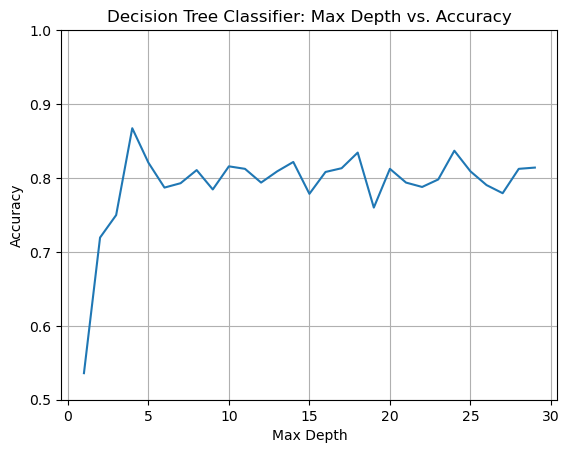

Highest Accuracy by Decision Tree: [4, 0.8672865595942519]


In [8]:
import matplotlib.pyplot as plt

X = np.array(dataset)
y = np.array(labels)

max_depth_list = []
acc_dt = []

highest_acc_dt = [0, 0]

for depth in range(1, 30):
    X_train_flat = X.reshape(X.shape[0], -1)
    X_test_flat = dataset_test.reshape(dataset_test.shape[0], -1)#testing with unknown dataset 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train_flat, y)
    y_pred_dt = dt.predict(X_test_flat)
    accuracy_dt = accuracy_score(labels_test, y_pred_dt)

    if accuracy_dt > highest_acc_dt[1]:
        highest_acc_dt[1] = accuracy_dt
        highest_acc_dt[0] = depth
    
    max_depth_list.append(depth)
    acc_dt.append(accuracy_dt)

plt.plot(max_depth_list, acc_dt)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Classifier: Max Depth vs. Accuracy')
plt.grid(True)
plt.ylim(0.5, 1.0)
plt.show()

print("Highest Accuracy by Decision Tree:", highest_acc_dt)
